In [3]:
import yfinance as yf 
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
from datetime import datetime
import pandas_datareader.data as web
from time import sleep
import quandl
import seaborn as sns
import sys
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF
import urllib
from datetime import date , timedelta

import requests
import json
import re

## Can we use Macro Momentum to predict gold?

-  High yield spread
- Change in yield curve
- Gold Trend


In [16]:
yiedl_10_2_tmp = web.DataReader('T10Y2Y','fred', '1970-01-01')# Daily
HY_spread_tmp = web.DataReader('BAMLH0A0HYM2','fred', '1970-01-01') # Daily
real_rate_tmp = web.DataReader('REAINTRATREARAT10Y','fred', '1970-01-01') # Daily

In [17]:
diff = 12 * 4

yiedl_10_2_change = yiedl_10_2_tmp.resample('W').last()
yiedl_10_2_change = yiedl_10_2_change.diff(diff)

HY_change = HY_spread_tmp.resample('W').last()
HY_change = HY_change.diff(diff)

yiedl_10_2_change.columns = ['curve_chg']
HY_change.columns = ['HY_chg']

In [18]:
# Gold
gld_daily_tmp = yf.download("GLD")
gld_daily= pd.DataFrame(gld_daily_tmp['Close'])
gld_daily.columns = ['Gold Trend']
gld_monthly = gld_daily.resample('W').last()
gld_trend = gld_monthly.pct_change(diff)

[*********************100%***********************]  1 of 1 completed


In [106]:
tol = pd.Timedelta('5 day')

data_tmp = pd.concat([yiedl_10_2_change, HY_change],axis =1)
data_tmp = pd.merge_asof(left=data_tmp,right=gld_trend,right_index=True,left_index=True,direction='nearest',tolerance=tol)


signals = pd.DataFrame()

for signal in data_tmp.columns:
    signals.loc[:, signal] = [1 if x>0 else 0 for x in data_tmp[signal]]
    
    
signals.index = data_tmp.index
    
gold_ret = gld_daily.resample('W').last().pct_change().shift(-1)
gold_ret.columns = ['Gold']

In [107]:
res_tmp = pd.concat([signals, gold_ret],axis =1)
res_tmp = res_tmp.dropna()
res_tmp = pd.concat([signals, gold_ret],axis =1)
res_tmp = res_tmp.dropna()

columns = list(res_tmp.columns)
columns.remove("Gold")

res = res_tmp[columns].multiply(res_tmp["Gold"], axis="index")
res['Comb'] = res[columns].mean(axis = 1) #Combined Strategy
res['Gold'] = res_tmp['Gold']

In [108]:
res = (res+1).cumprod()

<AxesSubplot:>

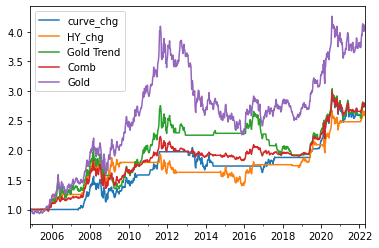

In [111]:
res.plot()